# SHAP Analysis

### Waterfall Plot <code>shap.plots.waterfall</code>

The waterfall plot is designed to visually display how the SHAP values of each feature **move the model output** from our prior expectation under the background data distribution, to the final model prediction given the evidence of all the features. 

In [7]:
import pandas as pd
import shap
import sklearn

X, y = shap.datasets.california(n_points = 1000)
X100 = shap.utils.sample(X, 100)

model = sklearn.linear_model.LinearRegression()
model.fit(X, y)

LinearRegression()

The most common way of understanding a linear model is to examine the coefficients learned for each feature. These coefficients tell us how much the model output changes when we change each of the input features:

In [9]:
print("Model coefficients:\n")
for i in range(X.shape[1]):
    print(f'{X.columns[i]} \t{model.coef_[i].round(5)}')

Model coefficients:

MedInc 	0.45769
HouseAge 	0.01153
AveRooms 	-0.12529
AveBedrms 	1.04053
Population 	5e-05
AveOccup 	-0.29795
Latitude 	-0.41204
Longitude 	-0.40125


While coefficients are great for telling us what will happen when we change the value of an input feature, by themselves they are not a great way to measure the overall importance of a feature. This is because the value of each coefficient depends on the scale of the input features.

In [11]:
explainer = shap.Explainer(model.predict, X100)
shap_values = explainer(X)

Exact explainer: 1001it [00:17, 31.37it/s]                         


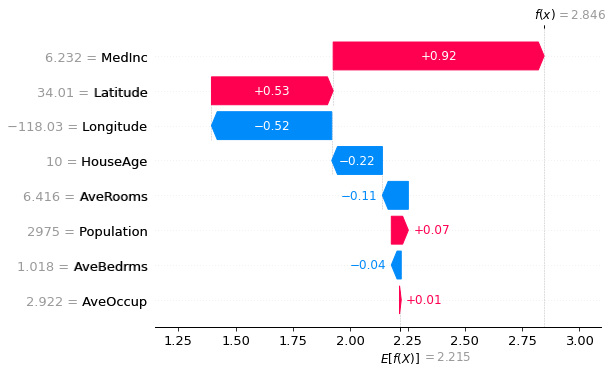

In [12]:
sample_ind = 20
shap.plots.waterfall(shap_values[sample_ind], max_display=14)